In [4]:
from openbb import obb
import mplfinance as mpf
import pandas as pd

In [9]:
obb.user.preferences.output_type = "dataframe" 
# this line will get the daily price history for SPY defaulting to the past year
dataSPY = obb.equity.price.historical("SPY", provider = "yfinance")

# print(dataSPY)    # print to see what your data looks like

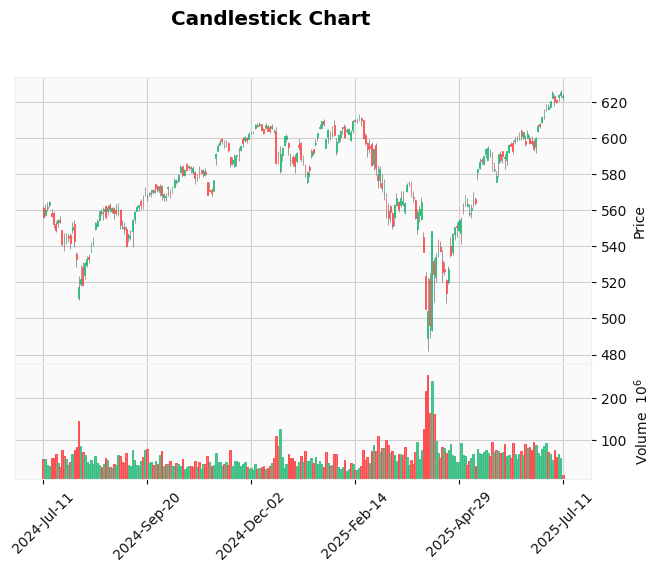

In [10]:
# Make sure the index is datetime and the DataFrame is properly formatted
dataSPY.index = pd.to_datetime(dataSPY.index)
dataSPY = dataSPY[['open', 'high', 'low', 'close', 'volume']]  # mplfinance expects these columns

mpf.plot(dataSPY, type='candle', style='yahoo', title="Candlestick Chart", volume=True)


Now let's make a function that will do this for you

In [22]:
def get_candlestick_chart(ticker):
    data = obb.equity.price.historical(ticker, provider = "yfinance")
    data.index = pd.to_datetime(data.index)
    data = data[['open', 'high', 'low', 'close', 'volume']]

    # Calculate Moving Averages
    data['MA50'] = data['close'].rolling(window=50).mean()
    data['MA25'] = data['close'].rolling(window=25).mean()

    # Calculate RSI
    delta = data['close'].diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)

    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()

    rs = avg_gain / avg_loss
    data['RSI'] = 100 - (100 / (1 + rs))

    # Build RSI panel
    rsi_panel = mpf.make_addplot(data['RSI'], panel=1, color='orange', ylabel='RSI')

    # Plot candlestick chart with MAs and RSI
    mpf.plot(
        data,
        type='candle',
        style='yahoo',
        title=f"{ticker.upper()} Candlestick Chart",
        volume=True,
        mav=(50, 25),
        addplot=[rsi_panel],
        panel_ratios=(2, 0.75),  # Bigger main chart, smaller RSI
    )

    # mpf.plot(data, type='candle', style='yahoo', title=f"{ticker} Candlestick Chart", volume=True)

Now let's plot with the 50 and 25 day moving averages

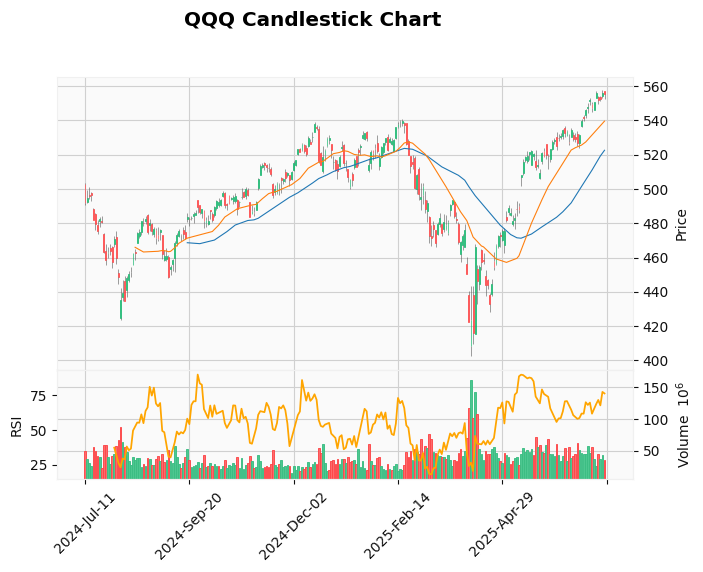

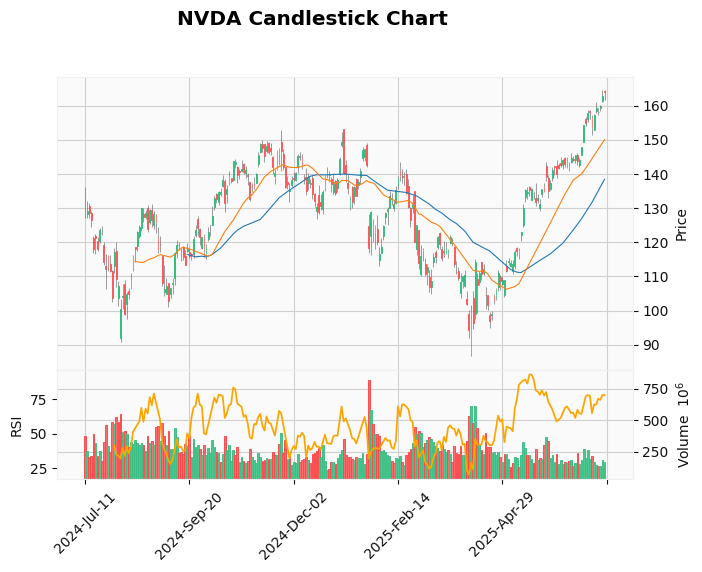

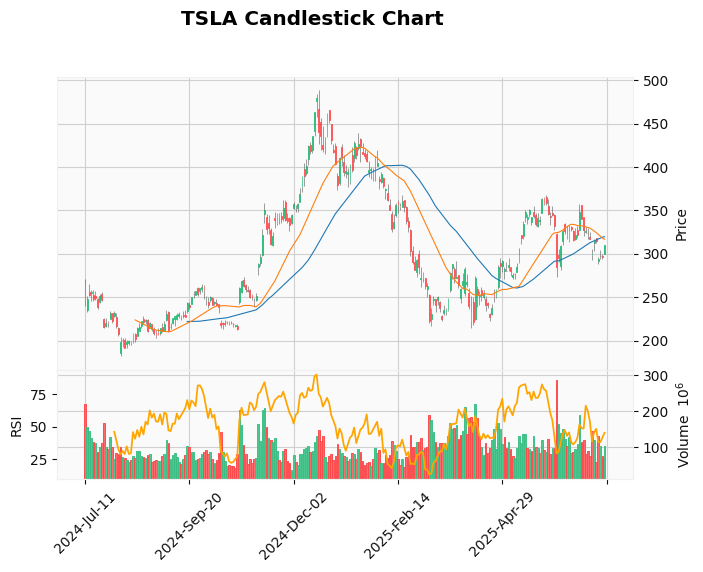

In [23]:
get_candlestick_chart("QQQ")
get_candlestick_chart("NVDA")
get_candlestick_chart("TSLA")